In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
file_path = file_path = r'C:\Users\tamya\OneDrive\Desktop\Project\Project_1\Resources\Impact_of_Remote_Work_on_Mental_Health.csv'

df = pd.read_csv(file_path)

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:

bins = [0, 19, 29, 39, 49, 59, 60] 
labels = ['Under 19', '20-29', '30-39', '40-49', '50-59', '60+']


df['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=labels)

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Age_Range
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,30-39
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,40-49
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,50-59
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,20-29
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,40-49


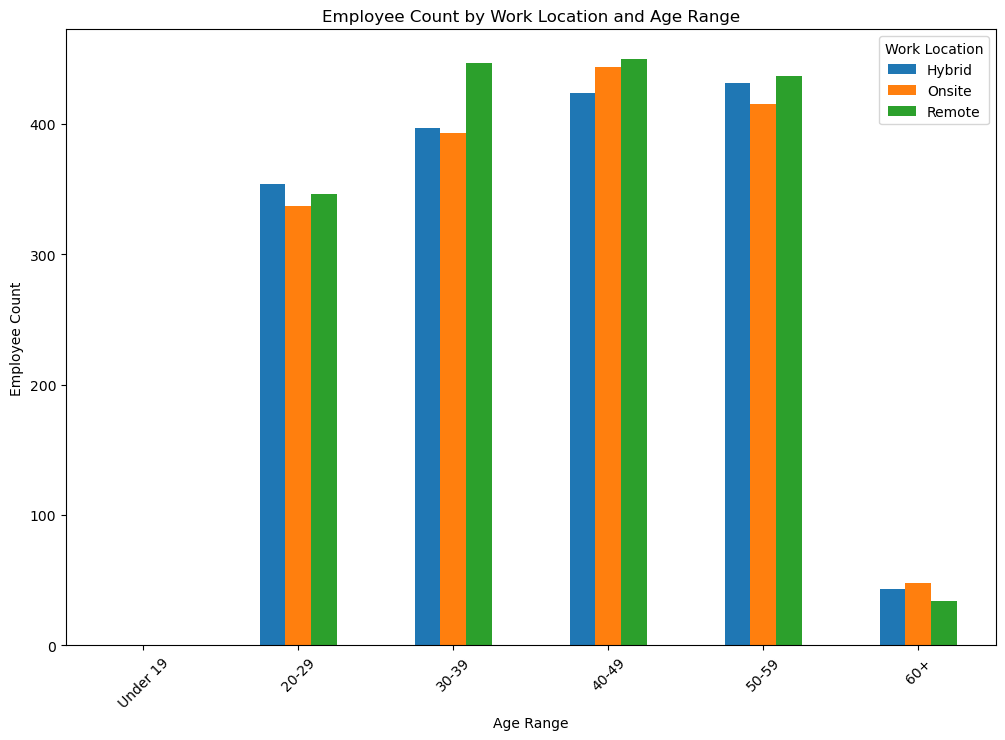

In [4]:
# Group by Age_Range and Work_Location, and count the number of Employee_IDs in each group
age_location_counts = age_location_counts = df.groupby(['Age_Range', 'Work_Location'], observed=False)['Employee_ID'].count().reset_index()
age_location_counts.rename(columns={'Employee_ID': 'Employee_Count'}, inplace=True)

# Pivot for plotting
age_location_pivot = age_location_counts.pivot(index='Age_Range', columns='Work_Location', values='Employee_Count')

# Plot the data
age_location_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Employee Count by Work Location and Age Range')
plt.xlabel('Age Range')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)
plt.legend(title='Work Location')
plt.show()

In [20]:
df['Work_Life_Balance_Rating'] = df['Work_Life_Balance_Rating'].replace({
    'Very Poor': 1, 
    'Poor': 2, 
    'Neutral': 3, 
    'Good': 4, 
    'Excellent': 5
})
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Age_Range
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,30-39
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,40-49
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,50-59
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,20-29
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,...,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia,30-39
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,...,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa,30-39
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,...,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania,40-49
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,...,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia,20-29


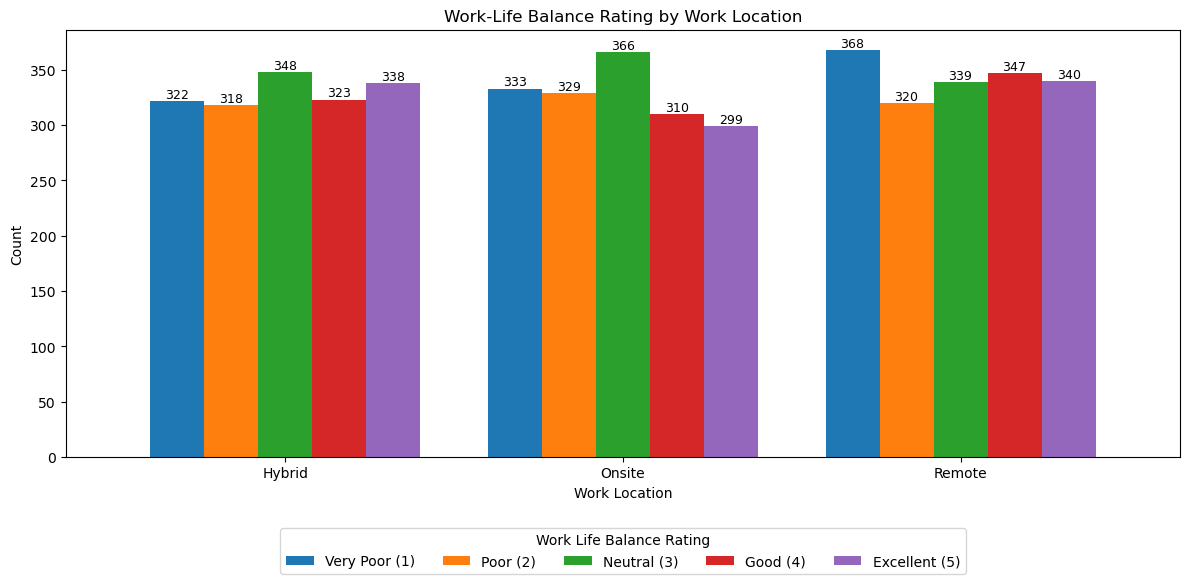

In [38]:
work_life_balance_by_location = df.groupby(['Work_Location', 'Work_Life_Balance_Rating']).size().unstack(fill_value=0)

# Plot the side-by-side bar chart
ax = work_life_balance_by_location.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Work-Life Balance Rating by Work Location')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

# Moving the legend to the top center
plt.legend(title='Work Life Balance Rating', labels=['Very Poor (1)', 'Poor (2)', 'Neutral (3)', 'Good (4)', 'Excellent (5)'],
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)


plt.tight_layout()
plt.show()

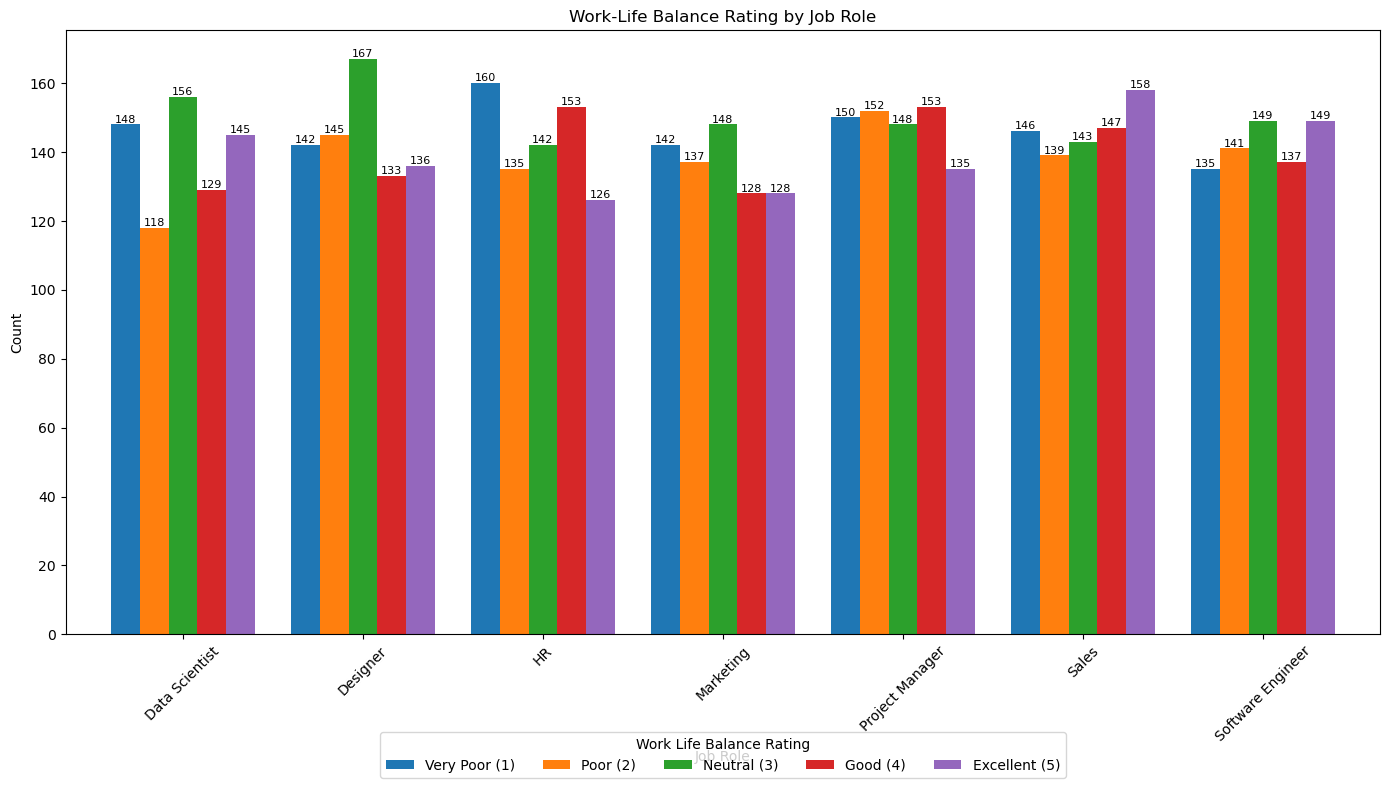

In [40]:
work_life_balance_by_job_role = df.groupby(['Job_Role', 'Work_Life_Balance_Rating']).size().unstack(fill_value=0)

# Plot the side-by-side bar chart
ax = work_life_balance_by_job_role.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Work-Life Balance Rating by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

# Position the legend
plt.legend(title='Work Life Balance Rating', labels=['Very Poor (1)', 'Poor (2)', 'Neutral (3)', 'Good (4)', 'Excellent (5)'],
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.tight_layout()
plt.show()


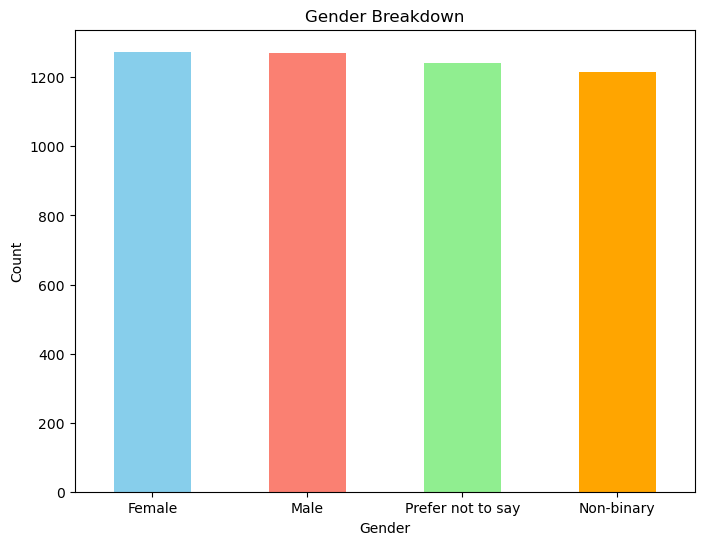

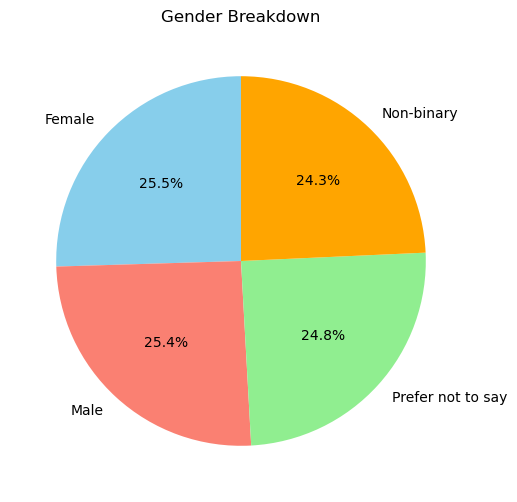

In [56]:
gender_counts = df['Gender'].value_counts()

# Bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Gender Breakdown')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Gender Breakdown')
plt.ylabel('')  # Remove the y-label for cleaner look in pie chart
plt.show()

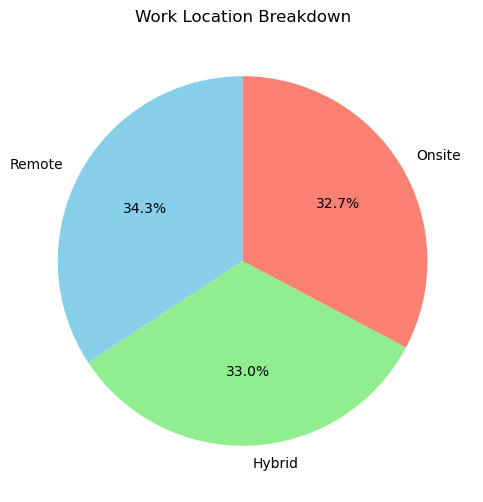

In [90]:
# Assuming 'df' is your DataFrame and contains a column named 'Work_Location'

# Count the occurrences of each work location
work_location_counts = df['Work_Location'].value_counts()


# Pie chart
plt.figure(figsize=(8, 6))
work_location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Work Location Breakdown')
plt.ylabel('')  # Remove y-label for cleaner look in pie chart
plt.show()

<Figure size 1200x600 with 0 Axes>

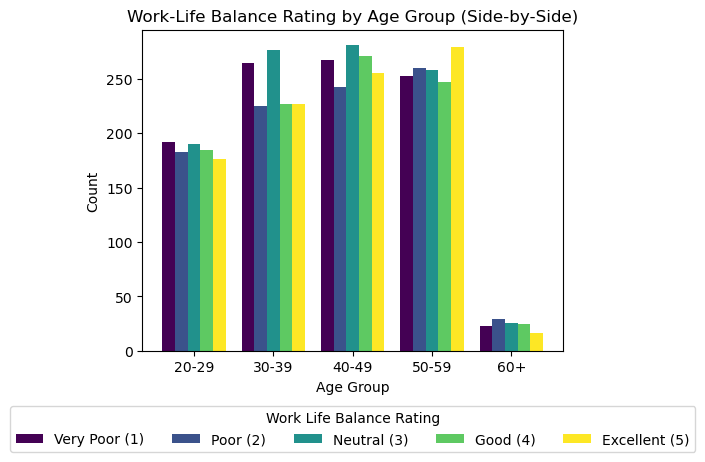

In [92]:
# Assuming 'df' is your DataFrame and contains 'Age' and 'Work_Life_Balance_Rating' columns

# Define age bins and labels
age_bins = [20, 29, 39, 49, 59, 60] 
age_labels = [ '20-29', '30-39', '40-49', '50-59', '60+']

# Create an Age_Group column based on the age bins
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age Group and Work-Life Balance Rating, then get the count
age_wlb_counts = df.groupby(['Age_Group', 'Work_Life_Balance_Rating'], observed=True).size().unstack(fill_value=0)


# Side-by-Side Bar Chart
plt.figure(figsize=(12, 6))
age_wlb_counts.plot(kind='bar', colormap='viridis', width=0.8)
plt.title('Work-Life Balance Rating by Age Group (Side-by-Side)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(title='Work Life Balance Rating', labels=['Very Poor (1)', 'Poor (2)', 'Neutral (3)', 'Good (4)', 'Excellent (5)'],
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
          

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

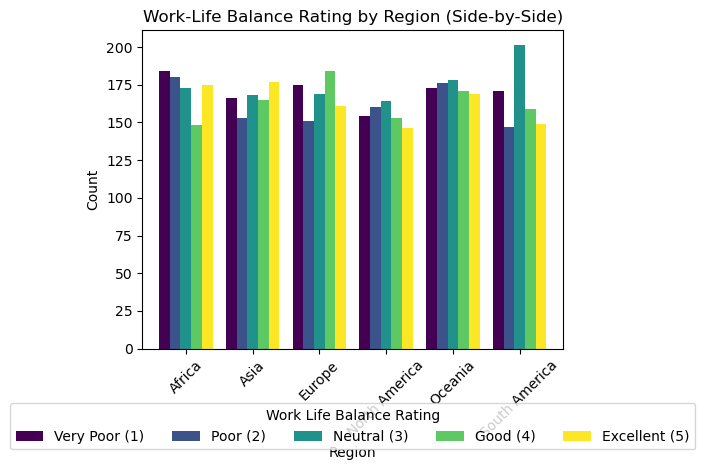

In [100]:
# Assuming 'df' is your DataFrame and contains columns 'Region' and 'Work_Life_Balance_Rating'

# Group by Region and Work-Life Balance Rating, then get the count
region_wlb_counts = df.groupby(['Region', 'Work_Life_Balance_Rating']).size().unstack(fill_value=0)


# Side-by-Side Bar Chart
plt.figure(figsize=(12, 6))
region_wlb_counts.plot(kind='bar', colormap='viridis', width=0.8)
plt.title('Work-Life Balance Rating by Region (Side-by-Side)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.legend(title='Work Life Balance Rating',labels=['Very Poor (1)', 'Poor (2)', 'Neutral (3)', 'Good (4)', 'Excellent (5)'],
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

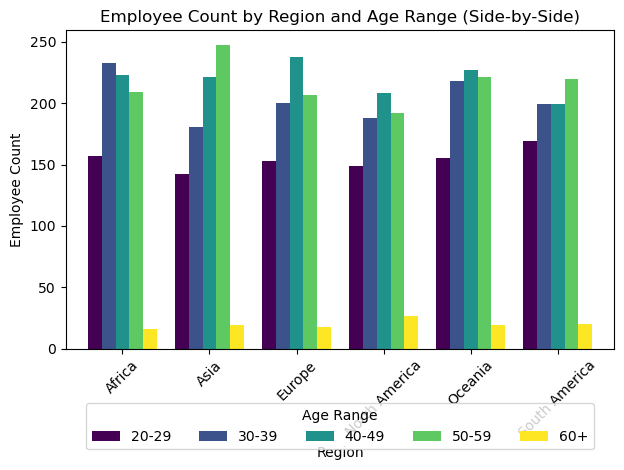

In [108]:
# Assuming 'df' is your DataFrame and contains 'Age' and 'Region' columns

# Define age bins and labels
age_bins = [20, 29, 39, 49, 59, 60] 
age_labels = [ '20-29', '30-39', '40-49', '50-59', '60+']

# Create an Age_Range column based on the age bins
df['Age_Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Region and Age Range, then get the count
region_age_counts = df.groupby(['Region', 'Age_Range'], observed=True).size().unstack(fill_value=0)


# Side-by-Side Bar Chart
plt.figure(figsize=(12, 6))
region_age_counts.plot(kind='bar', colormap='viridis', width=0.8)
plt.title('Employee Count by Region and Age Range (Side-by-Side)')
plt.xlabel('Region')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)

# Adjust legend position to bottom center
plt.legend(title='Age Range', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

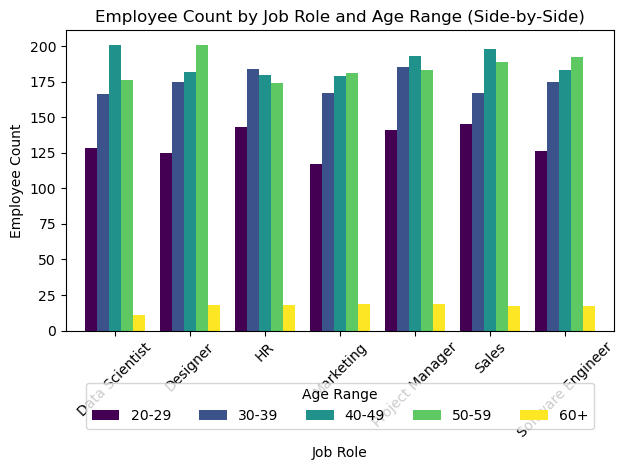

In [118]:
# Define age bins and labels
age_bins = [20, 29, 39, 49, 59, 60] 
age_labels = [ '20-29', '30-39', '40-49', '50-59', '60+']

# Create an Age_Range column based on the age bins
df['Age_Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Job Role and Age Range, then get the count
job_role_age_counts = df.groupby(['Job_Role', 'Age_Range'], observed=True).size().unstack(fill_value=0)

# Side-by-Side Bar Chart
plt.figure(figsize=(12, 6))
job_role_age_counts.plot(kind='bar', colormap='viridis', width=0.8)
plt.title('Employee Count by Job Role and Age Range (Side-by-Side)')
plt.xlabel('Job Role')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)

# Adjust legend position to bottom center
plt.legend(title='Age Range', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

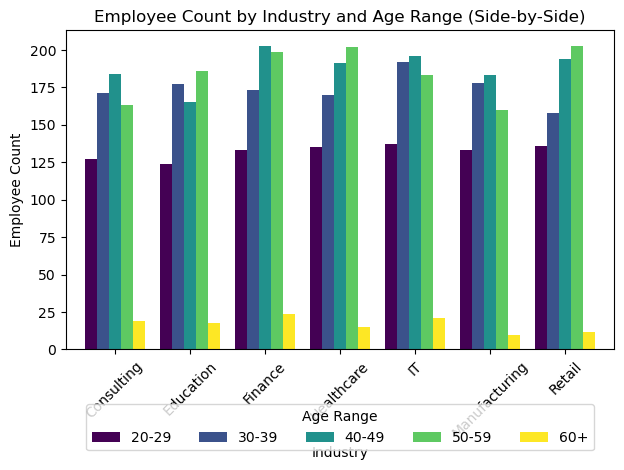

In [116]:
# Define age bins and labels
age_bins = [20, 29, 39, 49, 59, 60] 
age_labels = [ '20-29', '30-39', '40-49', '50-59', '60+']

# Create an Age_Range column based on the age bins
df['Age_Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Industry and Age Range, then get the count
industry_age_counts = df.groupby(['Industry', 'Age_Range'], observed=True).size().unstack(fill_value=0)


# Side-by-Side Bar Chart
plt.figure(figsize=(12, 6))
industry_age_counts.plot(kind='bar', colormap='viridis', width=0.8)
plt.title('Employee Count by Industry and Age Range (Side-by-Side)')
plt.xlabel('Industry')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)

# Adjust legend position to bottom center
plt.legend(title='Age Range', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()